## Predicción del consumo de gasolina usando TensorFlow

### Importar librerías

In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [98]:
data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [99]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [100]:
# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [101]:
# Características
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [102]:
# Objetivo
y = data.Petrol_Consumption
y.shape

(48,)

In [103]:
# Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [105]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [106]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(1))
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

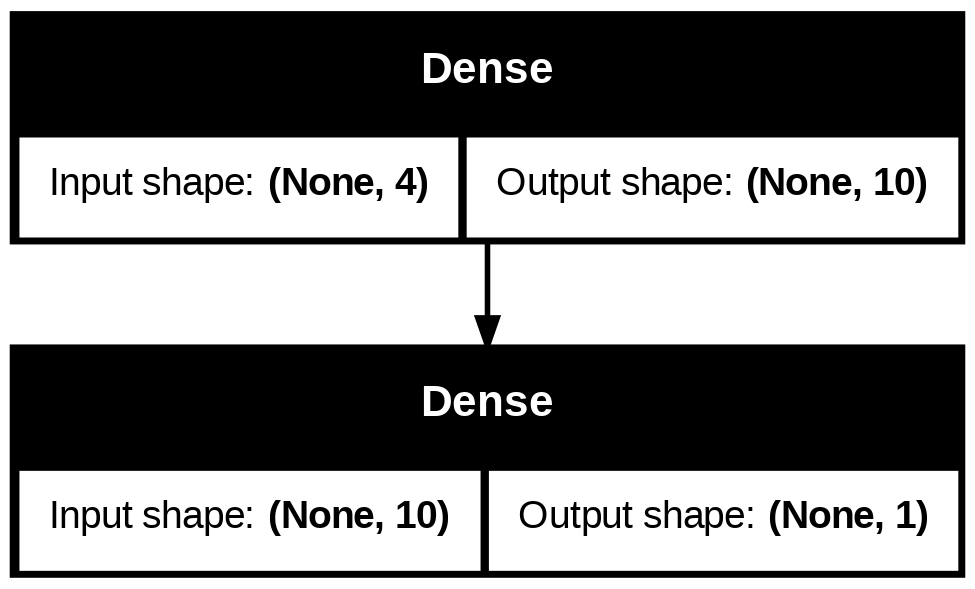

In [108]:
plot_model(model, show_shapes=True)

### Entrenamiento del modelo

In [109]:
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)

In [110]:
# Entrenamiento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,verbose=1, callbacks=[es])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 357895.3750 - mean_squared_error: 357895.3750 - val_loss: 307852.7500 - val_mean_squared_error: 307852.7500
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 353896.3438 - mean_squared_error: 353896.3438 - val_loss: 307833.4375 - val_mean_squared_error: 307833.4375
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 354353.6250 - mean_squared_error: 354353.6250 - val_loss: 307814.6875 - val_mean_squared_error: 307814.6875
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 355467.9062 - mean_squared_error: 355467.9062 - val_loss: 307796.5938 - val_mean_squared_error: 307796.5938
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 350983.7812 - mean_squared_error: 350983.7812 - val_loss: 307778.8438 - val_mean_squared_error: 307778.8438
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 356748.9688 - mean_squared_error: 356748.9688 - val_loss: 307761.3750 - val_mean_squared_error: 307761.3750
Epoch 7

### Evaluación del modelo

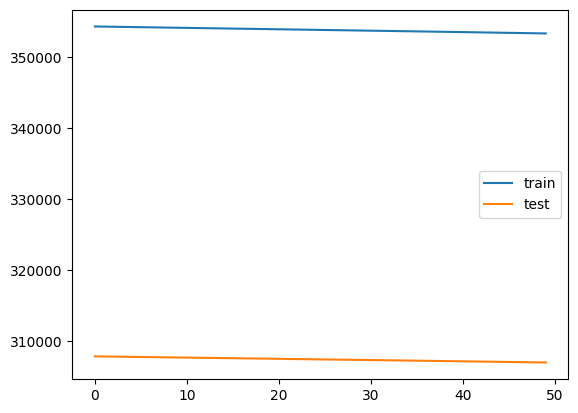

In [111]:
# Ploteando training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [112]:
# Error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
554.067170996222


In [113]:
y_pred.flatten()

array([ 1.1802614 ,  1.365321  ,  0.61359036, -0.38705844,  0.5694915 ,
        0.17514434,  0.67669547,  1.5038033 ,  0.8185711 ,  0.3123038 ],
      dtype=float32)

In [114]:
y_test

,Petrol_Consumption
29,534
4,410
26,577
30,571
32,577
37,704
34,487
40,587
7,467
10,580


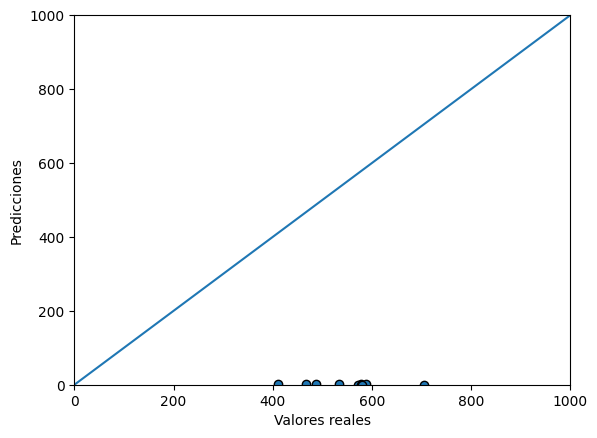

In [115]:
# Comparando predicciones vs valores reales
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [116]:
new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicción:  [[0.51816195]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Activity

Modify the hyperparameters and/or architecture in order to improve the current results.